In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from utils import *
%matplotlib inline

#increase plot size
plt.rcParams['figure.figsize'] = [16, 9]

import numpy as np
# maximum print option
np.set_printoptions(linewidth=400)

from model import Schelling

In [2]:
model = Schelling(width = 50, height = 50, density = 0.70, minority_pc = 0.4, homophily = 2,   policy = 'random', follow_policy=1)

In [3]:
while model.running and model.schedule.steps < 100:
    model.step()
print(model.schedule.steps)  # Show how many steps have actually run

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
8


In [4]:
model_out = model.datacollector.get_model_vars_dataframe()

In [5]:
model_out

,perc_happy,segregation
0,0.838836,0.422916
1,0.924454,0.451595
2,0.960828,0.462647
3,0.976497,0.473559
4,0.990487,0.476077
5,0.992725,0.480974
6,0.998321,0.482652
7,1.000000,0.482652


(0.8388360380526021, 1.0)

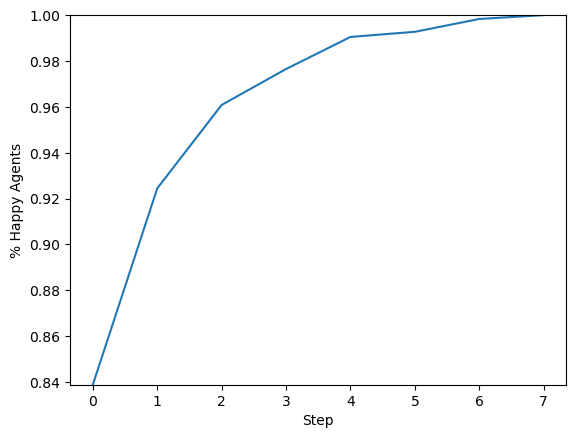

In [6]:
model_out.perc_happy.plot()
plt.xlabel("Step")
plt.ylabel("% Happy Agents")
plt.ylim(min(model_out.perc_happy),1)


Text(0, 0.5, '<S>')

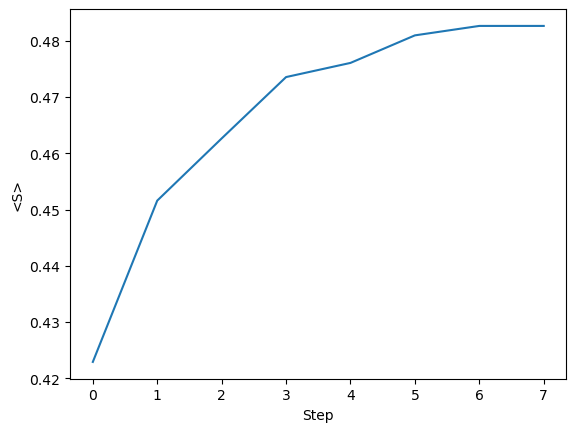

In [7]:
model_out.segregation.plot()
plt.xlabel("Step")
plt.ylabel("<S>")

# Effect of Homophily on segregation

Now, we can do a parameter sweep to see how segregation changes with homophily.

First, we create a function which takes a model instance and returns what fraction of agents are segregated -- that is, have no neighbors of the opposite type.

In [8]:
from mesa import batch_run

Now, we set up the batch run, with a dictionary of fixed and changing parameters. Let's hold everything fixed except for Homophily.

In [9]:
fixed_params = {
    'width': 50,
    'height': 50,
    'density': 0.70,
    'minority_pc': 0.4,
    'homophily': 2,
}

#policies = ["random", "distance", "relevance", "distance_relevance", "rich_neighborhood", "poor_neighborhood", "minimum_improvement", "maximum_improvement", "recently_emptied", "historically_emptied" ]

policies = ["random", "distance_relevance", "rich_neighborhood", "poor_neighborhood", "minimum_improvement", "maximum_improvement", "recently_emptied", "historically_emptied" ]

percentages = [i / 10 for i in range(11)]

variable_parms = {"policy": policies, "follow_policy": percentages}

merged_params = {**fixed_params, **variable_parms}
merged_params 

{'width': 50,
 'height': 50,
 'density': 0.7,
 'minority_pc': 0.4,
 'homophily': 2,
 'policy': ['random',
  'distance',
  'relevance',
  'distance_relevance',
  'rich_neighborhood',
  'poor_neighborhood',
  'minimum_improvement',
  'maximum_improvement',
  'recently_emptied',
  'historically_emptied'],
 'follow_policy': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

In [10]:
pd.options.mode.chained_assignment = None

results = batch_run(
    Schelling,
    parameters = merged_params,
    iterations=10,
    max_steps=100,
    number_processes = None
);

results_df = pd.DataFrame(results)


  0%|          | 0/1100 [00:00<?, ?it/s]

step 0
step 0
step 0
step 0
step 0
step 0
step 0
step 0
step 0
step 0
step 1
step 0
step 1
step 1
step 1
step 2
step 1
step 1
step 1
step 1
step 1
step 3
step 2
step 1
step 2
step 2
step 2
step 2
step 2
step 3
step 4
step 3
step 2
step 4
step 2
step 3
step 5
step 5
step 3
step 1
step 6
step 4
step 4
step 3
step 3
step 7
step 5
step 4
step 3
step 8
step 2
step 6
step 3step 9

step 5
step 10
step 4
step 7
step 6
step 6
step 5
step 4
step 7
step 5
step 8
step 4
step 4
step 6
step 9
step 5
step 6
step 8
step 7step 7

step 3
step 5
step 2
step 8
step 10
step 5
step 6
step 8
step 6
step 9
step 6
step 7
step 9
step 11
step 7
step 9
step 8
step 12
step 7
step 8
step 4
step 10
step 7
step 9
step 8
step 11
step 10
step 10
step 13
step 8
step 9
step 12
step 11
step 10
step 9
step 9
step 11
step 14
step 12
step 11
step 10
step 12
step 5
step 15
step 13
step 12
step 10
step 14
step 16
step 13
step 13
step 11
step 14
step 15
step 13
step 6
step 15
step 14
step 12
step 15
step 13
step 7
step 14
step 

In [11]:
results_df = results_df[["RunId", "iteration", "Step", "follow_policy", "policy",  "segregation"]]
results_df

,RunId,iteration,Step,follow_policy,policy,segregation
0,7,0,10,0.7,random,0.481239
1,3,0,9,0.3,random,0.495226
2,8,0,10,0.8,random,0.462134
3,5,0,13,0.5,random,0.481528
4,2,0,16,0.2,random,0.469281
...,...,...,...,...,...,...
1095,1096,9,12,0.7,historically_emptied,0.473031
1096,1095,9,13,0.6,historically_emptied,0.475862
1097,1098,9,11,0.9,historically_emptied,0.471957
1098,1097,9,10,0.8,historically_emptied,0.477311


In [15]:
#calculate the average Step and the average segregation, across different iteration and policy
results_df_g = results_df.groupby(['policy', 'follow_policy']).mean().reset_index()
results_df_g.head(20)

,policy,follow_policy,RunId,iteration,Step,segregation
0,distance,0.0,506.0,4.5,9.9,0.476915
1,distance,0.1,507.0,4.5,12.4,0.471942
2,distance,0.2,508.0,4.5,13.5,0.475531
3,distance,0.3,509.0,4.5,16.6,0.473663
4,distance,0.4,510.0,4.5,14.9,0.473727
5,distance,0.5,511.0,4.5,15.9,0.469482
6,distance,0.6,512.0,4.5,17.1,0.467226
7,distance,0.7,513.0,4.5,16.7,0.465912
8,distance,0.8,514.0,4.5,14.9,0.466541
9,distance,0.9,515.0,4.5,14.7,0.467909


In [19]:
#per each policy, extract the timeseries of Step and segregation
results_df_g_step = results_df_g.pivot(index='follow_policy', columns='policy', values='Step')
results_df_g_segregation = results_df_g.pivot(index='follow_policy', columns='policy', values='segregation')



<Axes: xlabel='follow_policy'>

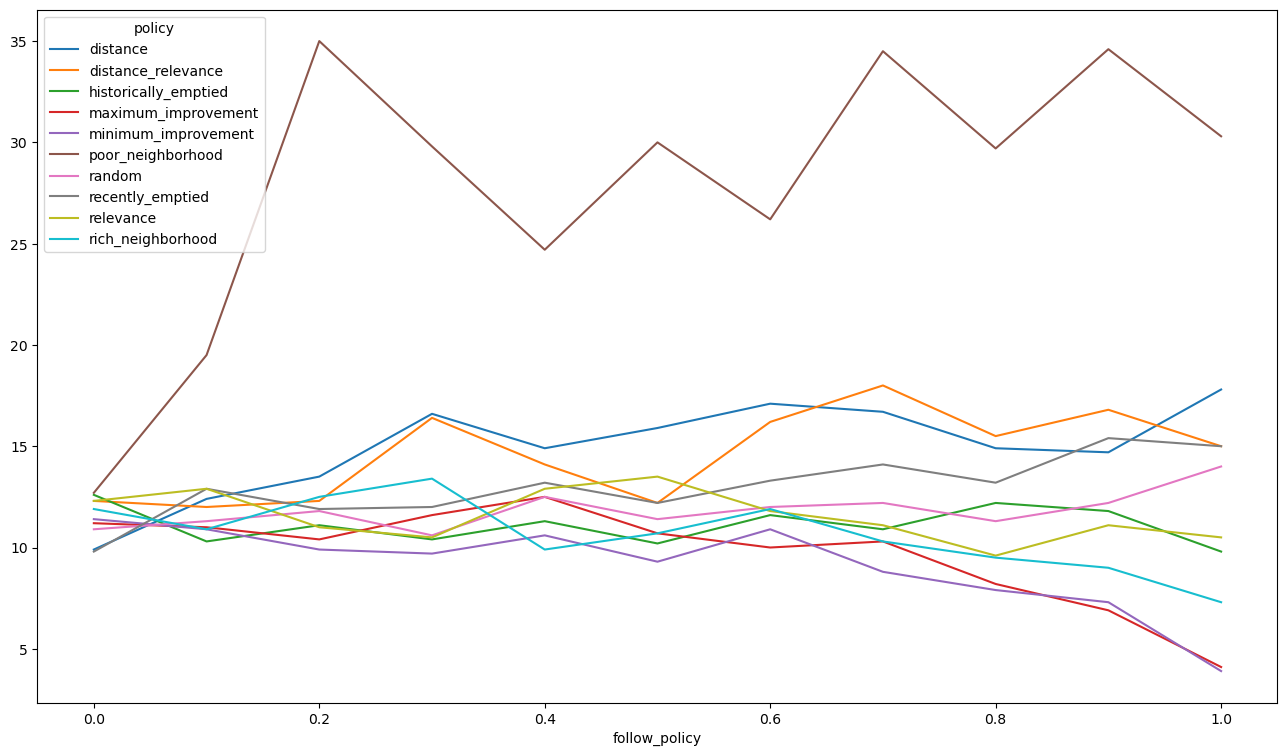

In [20]:
#plot the timeseries of Step
results_df_g_step.plot()

<Axes: xlabel='follow_policy'>

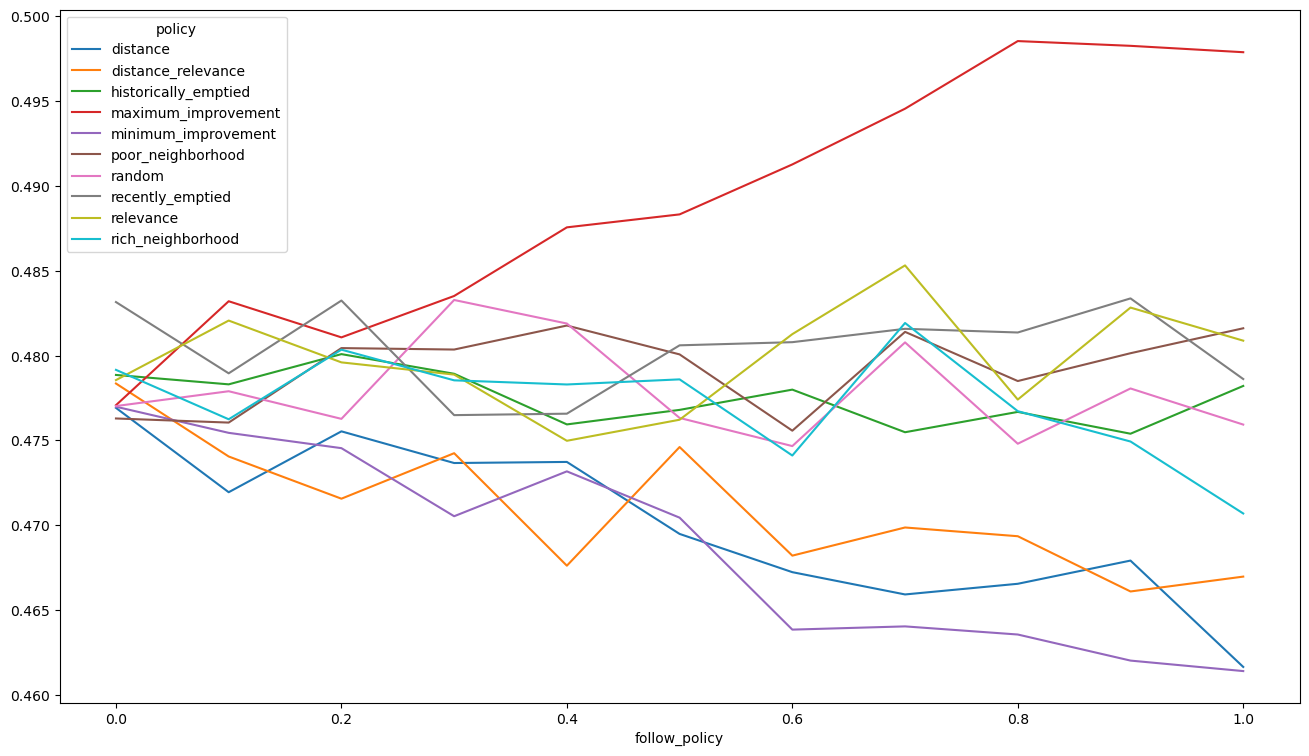

In [21]:
#plot the timeseries of Step
results_df_g_segregation.plot()